<a href="https://colab.research.google.com/github/ejaz-uddin-swaron/phitron-phase-2-ai-ml-dl-python/blob/main/Ejaz_Uddin_Swaron_ML_Mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Email address: swaron3214@gmail.com**

ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [ ]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

_Write your calculations and explanation here. You may use Python below if you want, but final reasoning must be readable._

*Question 1: It is answered through the code below.*

*Question 2: 500 is an outlier. The code is shown below*

*Question 3: Median + IQR is better here. Because the dataset has an outlier, which is 500. We know that the median and the IQR are not affected by outliers, but the mean and standard deviation are affected by outliers so it is better to avoid them to calculate, for example standardization (e.g. standardization = (x-median) / IQR).*

In [ ]:
from scipy.sparse import data
# Optional helper code for Q1 (not required)

# --------------------------------------------------- 1 --------------------------------------------------

data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1.sort()

median = np.median(data_q1)

Q1 = np.percentile(data_q1,25)
Q3 = np.percentile(data_q1,75)

IQR = Q3-Q1
print(f"Median: {median}")
print(f"IQR: {IQR}")

# --------------------------------------------------- 2 --------------------------------------------------

lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

for x in data_q1:
  if x < lower_fence or x > upper_fence:
    print(f"Outlier detected: {x}")


Median: 33.0
IQR: 2.0
Outlier detected: 500


### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

_Write your step by step Bayes calculation and explanation here._

*Population of 100 people.*

*Sick people: 1 person per 100 = 1%*

*True Positives: 1 * 0.9 = 0.9*

*Healthy people: 100 - 1 = 99 people*

*False Positives: 99 * (1 - 0.92) = 99 * 0.08 = 7.92*

*Total Positive results: 0.9 + 7.92 = 8.82*

*P(Disease | Positive): True Positives / Total Positives = 0.9 / 8.82 ~ 0.09*

*If prevalence increases, the PPV will also increase because true positive rate will be increased. False positive will not increase that much. So, PPV will be increased.*



### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

_Write your task type, preprocessing list, and pipeline paragraph here._

*1. Supervised classification type. Because the output is categorical (0 or 1 target), and we use labels not like trial and error.*

*2. Four preprocessing steps -*

- Handling missing values
- Encoding categorical variables
- Normalization
- Scaling

*3. I will collect the dataset by following the EDA (Exploratory Data Analysis) rules. Then I will do preprocessing (e.g. remove duplicates, handle outliers, handle missing values, encoding, scaling etc). Now, I will train the model by splitting into 2 sets that are train and test set (70% and 30%). Finally I will push the model go through the evaluation process. The metrics that I will use are precision, recall, accuracy, F1 score etc.*

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


age             2
region          0
purchases       1
premium_user    0
dtype: int64

age             5
region          4
purchases       6
premium_user    2
dtype: int64

                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000



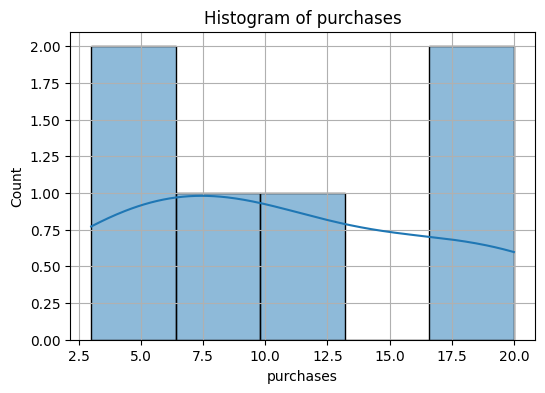

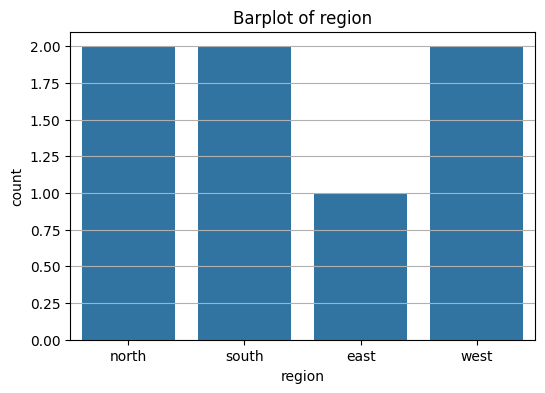

,age,purchases,premium_user,region_east,region_north,region_south,region_west,age_x_purchase
0,-0.5,-0.943820,0.0,0,1,0,0,0.471910
1,0.0,0.000000,1.0,0,0,1,0,0.000000
2,0.0,-0.674157,0.0,0,1,0,0,-0.000000
3,-0.8,0.112360,0.0,1,0,0,0,-0.089888
4,1.5,1.348315,1.0,0,0,0,1,2.022472
5,2.2,1.078652,1.0,0,0,0,1,2.373034
6,0.0,-0.134831,0.0,0,0,1,0,-0.000000


In [ ]:
from ast import mod
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

# --------------------------------------------------- 1 --------------------------------------------------

numeric_cols = ["age", "purchases", "premium_user"]

print(df.isna().sum(), end="\n\n")

print(df.nunique(), end="\n\n")

print(df[numeric_cols].corr(), end="\n\n")

sns.histplot(data=df, x="purchases", bins=5, kde=True)
plt.title("Histogram of purchases")
plt.show()

sns.countplot(data=df, x="region")
plt.title("Barplot of region")
plt.show()

# --------------------------------------------------- 2 --------------------------------------------------

median = df["age"].median()
df["age"] = df["age"].fillna(median)

mean = df["purchases"].mean()
df["purchases"] = df["purchases"].fillna(mean)

df = pd.get_dummies(
    df,
    dtype=int
)

# moddhok =  df_encoded[numeric_cols].median()
# Q1 = df_encoded[numeric_cols].quantile(0.25)
# Q3 = df_encoded[numeric_cols].quantile(0.75)
# IQR = Q3-Q1

# df_encoded[numeric_cols] = (df_encoded[numeric_cols] - moddhok) / IQR

rs = RobustScaler()
df[numeric_cols] = rs.fit_transform(df[numeric_cols])

# I tried both ways to calculate robust scaling

# --------------------------------------------------- 3 --------------------------------------------------

df["age_x_purchase"] = df["age"] * df["purchases"]

# --------------------------------------------------- 4 --------------------------------------------------

display(df)

_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

*I have written all the codes in one cell (check the last cell please)*

*As for the important blocks-*
- *I have checked some important stuffs like missing values, unique values.*
- *Then I plotted the histogram and countplot.*
- *Then I handled the missing values.*
- *Then I encode and created a domain-driven feature*

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


Intercept (c): -33.84615384615387
Slope (m): 0.15384615384615388
prediction: [100.         130.76923077]
Mean Absolute Error: 19.615384615384613
Root Mean Squared Error: 19.61915499208746
R Square Score: -0.7107166337935567


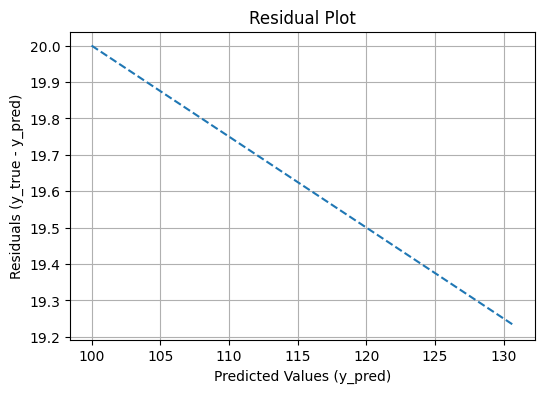

In [ ]:
from matplotlib.lines import lineStyles
from sklearn.metrics import accuracy_score

# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

# --------------------------------------------------- 2 --------------------------------------------------

X = df2.drop(columns="price")
y = df2["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# --------------------------------------------------- 3 --------------------------------------------------

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# --------------------------------------------------- 4 --------------------------------------------------

print(f"Intercept (c): {model.intercept_}")
print(f"Slope (m): {model.coef_[0]}")
print(f"prediction: {pred}")

# --------------------------------------------------- 5 --------------------------------------------------

mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

r_square = r2_score(y_test, pred)
print(f"R Square Score: {r_square}")

# --------------------------------------------------- 6 --------------------------------------------------

residuals = y_test - pred

plt.plot(pred, residuals, linestyle="--")
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residual Plot")
plt.show()


_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

*All codes done in one cell*

*First of all, a dataframe is created. Then I took two portions, X = all the features except the target and y = the target column. Now, I have followed the question (splitted the dataset 80/20). Trained and predicted using the model. Then, calculated some metrics. Finally, the residual plot.*

*The graph is downward sloping. If prediction is increasing, residual is decreasing and vice versa.*

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [ ]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below

# --------------------------------------------------- 1 --------------------------------------------------

print("With threshold 0.5", end="\n\n")

y_predicted = (y_prob >= 0.5).astype(int)

cm = confusion_matrix(y_true, y_predicted)
print(f"Confusion Matrix: ")
print(cm)

precision = precision_score(y_true, y_predicted)
print(f"Precision: {precision}")

recall = recall_score(y_true, y_predicted)
print(f"Recall: {recall}")

f1 = f1_score(y_true, y_predicted)
print(f"F1 Score: {f1}")

# --------------------------------------------------- 2 --------------------------------------------------

print()
print("With threshold 0.3", end="\n\n")

y_predicted = (y_prob >= 0.3).astype(int)

cm = confusion_matrix(y_true, y_predicted)
print(f"Confusion Matrix: ")
print(cm)

precision = precision_score(y_true, y_predicted)
print(f"Precision: {precision}")

recall = recall_score(y_true, y_predicted)
print(f"Recall: {recall}")

f1 = f1_score(y_true, y_predicted)
print(f"F1 Score: {f1}")

# --------------------------------------------------- 3 --------------------------------------------------

# When the threshold decreased to 0.3, it will treat more cases as positive. It will reduce precision,
# because the model will not be able to predict properly. But here recall remains same.


With threshold 0.5

Confusion Matrix: 
[[5 0]
 [0 5]]
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

With threshold 0.3

Confusion Matrix: 
[[3 2]
 [0 5]]
Precision: 0.7142857142857143
Recall: 1.0
F1 Score: 0.8333333333333334


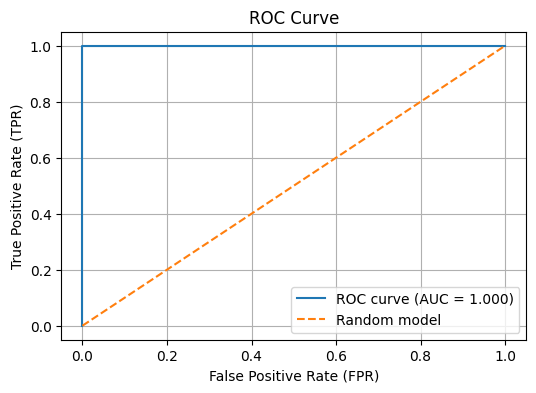

AUC: 1.0


In [ ]:
# Part 2: ROC and AUC (6 marks)

# --------------------------------------------------- 4 --------------------------------------------------

fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random model')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

# --------------------------------------------------- 5 --------------------------------------------------

print("AUC:", round(roc_auc, 3))

# --------------------------------------------------- 6 --------------------------------------------------

# AUC Value:
# 1.0 -> Perfect classifier
# 0.7-0.9 -> Good classifier
# 0.5 -> Random guessing
#< 0.5 Bad (Predicts in the opposite direction)



[0 0 0 1 1 0 0 0 1 1]


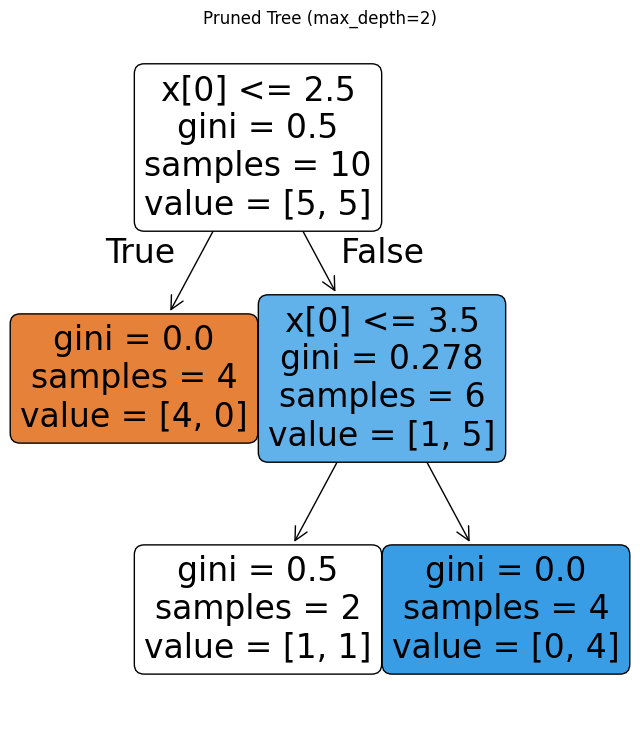

In [ ]:
# Part 3: Decision Tree on a small dataset (6 marks)

df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

# --------------------------------------------------- 7 --------------------------------------------------

X = df3[["hours"]]
y = df3["passed"]

pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
pruned_tree.fit(X, y)

pred = pruned_tree.predict(X)
print(pred)

plt.figure(figsize=(8,9))
plot_tree(pruned_tree, filled=True, rounded=True)
plt.title("Pruned Tree (max_depth=2)")
plt.show()

# --------------------------------------------------- 8 --------------------------------------------------

# The dataset is very small and model depth is 2 only so, it will not overfit (Trained well and predicts well with common inputs but
# struggles with unseen inputs). So, it generalizes well.


_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._